# Membuat Koneksi ke Google Drive

In [1]:
# Mount Google Drive Di Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Menghubungkan SQL ke Python dan Melihat Daftar Tabel dalam Database

In [2]:
import sqlite3

# Path ke file database SQLite
db_path = '/content/drive/My Drive/File Project Growia/foo.db'

# Koneksi ke database SQLite
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Query untuk mendapatkan daftar tabel
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Menampilkan nama tabel
print("Daftar tabel di database:")
for table in tables:
    print(table[0])

Daftar tabel di database:
olist_customers_dataset
olist_geolocation_dataset
olist_orders_dataset
olist_order_items_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset
olist_sellers_dataset
product_category_name_translation


# Mempersiapkan Dataset dan Library yang dibutuhkan

In [3]:
# Import Library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Query data
# olist_customers_dataset
olist_customers_dataset = "SELECT * FROM olist_customers_dataset"
df_customers = pd.read_sql_query(olist_customers_dataset, conn)

# olist_geolocation_dataset
olist_geolocation_dataset = "SELECT * FROM olist_geolocation_dataset"
df_geolocation = pd.read_sql_query(olist_geolocation_dataset, conn)

# olist_orders_dataset
olist_orders_dataset = "SELECT * FROM olist_orders_dataset"
df_orders = pd.read_sql_query(olist_orders_dataset, conn)

# olist_order_items_dataset
olist_order_items_dataset = "SELECT * FROM olist_order_items_dataset"
df_order_items = pd.read_sql_query(olist_order_items_dataset, conn)

# olist_order_payments_dataset
olist_order_payments_dataset = "SELECT * FROM olist_order_payments_dataset"
df_order_payments = pd.read_sql_query(olist_order_payments_dataset, conn)

# olist_order_reviews_dataset
olist_order_reviews_dataset = "SELECT * FROM olist_order_reviews_dataset"
df_order_reviews = pd.read_sql_query(olist_order_reviews_dataset, conn)

# olist_products_dataset
olist_products_dataset = "SELECT * FROM olist_products_dataset"
df_products = pd.read_sql_query(olist_products_dataset, conn)

# olist_sellers_dataset
olist_sellers_dataset = "SELECT * FROM olist_sellers_dataset"
df_sellers = pd.read_sql_query(olist_sellers_dataset, conn)

# product_category_name_translation
product_category_name_translation = "SELECT * FROM product_category_name_translation"
df_category = pd.read_sql_query(product_category_name_translation, conn)

# Menutup koneksi
# conn.close()

# Pemahaman Data

In [4]:
display(df_customers.sample(2)) # Mengambil sample data dari df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
71054,cb68d5f9e36d9b5789508f8aeade936a,d815021b4d2400e191b912e96d494b2a,88080,florianopolis,SC
64434,1842254f8f4673251a9953dc8d5f0fa4,31d958dffbf0b744375b5ff0393e6fb3,16016,aracatuba,SP


In [5]:
display(df_geolocation.sample(2)) # Mengambil sample data dari df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
921563,89015,-26.905905125157965,-49.038784578013015,blumenau,SC
384226,18110,-23.539341302655977,-47.46548837733765,votorantim,SP


In [6]:
display(df_orders.sample(2)) # Mengambil sample data dari df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
35789,cfb8af32c76c2ffd85a000a1e223f667,ae5a5926ae3f6d1bcfe62cbf595d7e09,delivered,2018-04-17 18:42:12,2018-04-19 02:35:14,2018-04-24 00:50:57,2018-05-02 19:21:57,2018-05-14 00:00:00
76721,5d4cc700b2defe73524d7d22320fdd34,be7a83d198cf17da19a8dcb5ac484126,delivered,2018-06-08 23:54:11,2018-06-09 00:20:27,2018-06-12 13:44:00,2018-06-14 20:58:58,2018-06-26 00:00:00


In [7]:
display(df_order_items.sample(2)) # Mengambil sample data dari df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
46366,695a0091620b9e01ecc38829ad3e71f8,1,00baba5b58e274d0332a0c8a0a66f877,d3f39f05462b79a4562d35893a28f159,2017-11-30 16:31:20,47.90,15.10
17833,28e4584280c4d5de2fdd95ab155da4d0,1,d2e1eee81b5ff42f0f1f4693e1182349,0adac9fbd9a2b63cccaac4f8756c1ca8,2018-05-15 20:15:26,29.90,18.23


In [8]:
display(df_order_payments.sample(2)) # Mengambil sample data dari df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
70893,174394823ac1f610113794f480f3b60e,1,credit_card,2,48.22
93980,fdfb73b2a9e88e518c2f565f43ca06c1,1,credit_card,3,49.56


In [9]:
display(df_order_reviews.sample(2)) # Mengambil sample data dari df_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
53271,57cbfffec7ffb3889f0da6c5976a6dbb,87cb6bc6178f0a340e40123b7b042243,1,PÉSSIMO,"NÃO RECEBI O PRODUTO ATE AGORA , E lannister N...",2018-05-03 00:00:00,2018-05-05 11:33:21
22701,3dc28c3760134625a36ddef418974396,0801f0d06dea3e577f48276a2a225597,5,,,2017-10-26 00:00:00,2017-10-26 20:09:01


In [10]:
display(df_products.sample(2)) # Mengambil sample data dari df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
21235,d938227f7f7591d77e900cf3df3a645d,beleza_saude,49,2938,1,2300,35,13,13
6604,1144808d80753334c836d4bfab367400,informatica_acessorios,56,257,1,325,46,8,20


In [11]:
display(df_sellers.sample(2)) # Mengambil sample data dari df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1057,5b97c06a046398e7005b2b7c0d707a92,38770,joao pinheiro,MG
97,709e16e2b25c7474d980076c6bfc4806,16200,birigui,SP


In [12]:
display(df_category.sample(2)) # Mengambil sample data dari df_category

,﻿product_category_name,product_category_name_english
3,cama_mesa_banho,bed_bath_table
42,moveis_sala,furniture_living_room


# Menggabungkan Dataframe

In [13]:
# Gabungkan df_orders dengan df_order_items berdasarkan order_id
orders_items = pd.merge(df_orders, df_order_items, on='order_id', how='inner')

# Gabungkan orders_items dengan df_order_payments berdasarkan order_id
orders_items_payments = pd.merge(orders_items, df_order_payments, on='order_id', how='inner')

# Gabungkan orders_items_payments dengan df_order_reviews berdasarkan order_id
orders_items_payments_reviews = pd.merge(orders_items_payments, df_order_reviews, on='order_id', how='inner')

# Gabungkan orders_items_payments_reviews dengan df_products berdasarkan product_id
orders_items_payments_reviews_products = pd.merge(orders_items_payments_reviews, df_products, on='product_id', how='inner')

# Gabungkan orders_items_payments_reviews_products dengan df_customers berdasarkan customer_id
df_merged = pd.merge(orders_items_payments_reviews_products, df_customers, on='customer_id', how='inner')

# Gabungkan df_merged dengan df_sellers berdasarkan seller_id
df_merged = pd.merge(df_merged, df_sellers, on='seller_id', how='inner')

# Gabungkan df_merged dengan df_category berdasarkan product_category_name
# df_merged = pd.merge(df_merged, df_category, on='product_category_name', how='left')
# Dinonaktifkan karena error setiap menggabungkan dengan df_category

df_geolocation['geolocation_lat'] = pd.to_numeric(df_geolocation['geolocation_lat'], errors='coerce')
df_geolocation['geolocation_lng'] = pd.to_numeric(df_geolocation['geolocation_lng'], errors='coerce')

# Kelompokkan df_geolocation berdasarkan geolocation_zip_code_prefix (untuk menghindari crash)
geolocation_unique = df_geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

# Gabungkan df_merged dengan geolocation_unique berdasarkan customer_zip_code_prefix
df_merged = pd.merge(df_merged, geolocation_unique, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Gabungkan df_merged dengan geolocation_unique berdasarkan seller_zip_code_prefix
df_merged = pd.merge(df_merged, geolocation_unique, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left', suffixes=('_customer', '_seller'))

# df_merged sekarang berisi gabungan dari semua DataFrame

In [14]:
df_merged.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller
56357,c2b88e285b675e490d60c733f34c3d7f,b7f5ae711454e069867c611d0079b090,delivered,2017-12-04 08:32:07,2017-12-04 09:16:47,2017-12-05 22:22:46,2017-12-21 16:17:16,2017-12-28 00:00:00,1,4cfd7d1aae59a0b4f117e39ccbb0deec,...,SP,14940,ibitinga,SP,11721,-24.010997,-46.452192,14940,-21.757321,-48.829744
108046,b7db45f8be850ed08d9790e874772966,61fe8bb74fbc2eac555010a7bbe4914f,delivered,2017-12-19 15:54:00,2017-12-19 16:10:16,2017-12-20 20:25:22,2018-01-08 19:27:36,2018-01-23 00:00:00,1,461f43be3bdf8844e65b62d9ac2c7a5a,...,CE,14850,pradopolis,SP,60442,-3.755033,-38.562746,14850,-21.359937,-48.073913
26891,8a9e4058bd52b1df24af22b9cd604f87,62fd641e1ebc8e22418e3dc08a5381f3,delivered,2017-05-21 08:01:57,2017-05-22 10:39:43,2017-05-22 10:52:17,2017-05-24 12:41:57,2017-06-13 00:00:00,1,ca6d10d1487b13988e0241beaa7fa089,...,MG,25900,mage,RJ,35740,-19.781928,-44.260614,25900,-22.651420,-43.066558
27975,47079aaea155f6682964d23c1b9d0ab2,f8c10189b4213f078fd1e229aabb7281,delivered,2018-02-28 11:07:53,2018-02-28 11:32:27,2018-02-28 23:03:34,2018-04-11 20:08:41,2018-03-20 00:00:00,1,2b0ee2d07306f7c9ac55a43166e9bb4b,...,RJ,14940,ibitinga,SP,22793,-23.000619,-43.404718,14940,-21.757321,-48.829744
22581,a1f1c1a9b85e3577708c859890081c48,4796e39a763d67f1eea914be94b6533e,delivered,2018-05-07 15:48:42,2018-05-07 17:30:07,2018-05-09 05:55:00,2018-05-16 00:42:20,2018-06-08 00:00:00,1,39ac440ab059438fe111c13c78aa46f9,...,RJ,02118,sao paulo,SP,21241,-22.813497,-43.308037,02118,-23.515007,-46.592775


In [15]:
df_merged.tail(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller
117324,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,17602,tupa,SP,11722,-24.001500,-46.449864,17602,-21.930548,-50.498348
117325,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,BA,08290,sao paulo,SP,45920,-17.898358,-39.373630,08290,-23.553642,-46.452661
117326,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,37175,ilicinea,MG,28685,-22.562825,-42.694574,37175,-20.940578,-45.827237
117327,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,37175,ilicinea,MG,28685,-22.562825,-42.694574,37175,-20.940578,-45.827237
117328,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1,006619bbed68b000c8ba3f8725d5409e,...,PR,14407,franca,SP,83750,-25.764308,-49.720376,14407,-20.496251,-47.418434


# Penanganan Null Values

## 1. Identifikasi Null Values

In [16]:
# Mengecek jumlah null values di setiap kolom
df_merged.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


Semua kolom yang memiliki null values terkait dengan data geolocation pelanggan dan penjual

In [17]:
# Mendapatkan kolom-kolom yang memiliki null values
null_columns = df_merged.columns[df_merged.isnull().any()]

# Menampilkan kolom-kolom dan jumlah null values
for column in null_columns:
    print(f"Kolom '{column}': {df_merged[column].isnull().sum()} null values")

Kolom 'geolocation_zip_code_prefix_customer': 316 null values
Kolom 'geolocation_lat_customer': 316 null values
Kolom 'geolocation_lng_customer': 316 null values
Kolom 'geolocation_zip_code_prefix_seller': 264 null values
Kolom 'geolocation_lat_seller': 264 null values
Kolom 'geolocation_lng_seller': 264 null values


## 2. Mengapa Null Values Bisa Terjadi?
Dalam proses penggabungan data menggunakan pd.merge(), null values muncul ketika ada baris data di salah satu DataFrame yang tidak memiliki pasangan atau kecocokan di DataFrame lain berdasarkan kolom kunci yang ditentukan. Karena tidak ada data yang sesuai untuk digabungkan, pandas akan mengisi kolom-kolom tersebut dengan null values untuk menunjukkan bahwa informasi tersebut tidak tersedia

## 3. Bagaimana Cara Menangani Null Values Tersebut?

In [18]:
# Menghapus baris dengan null values di kolom geolocation
df_merged = df_merged.dropna(subset=['geolocation_zip_code_prefix_customer', 'geolocation_lat_customer', 'geolocation_lng_customer', 'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller', 'geolocation_lng_seller'])

Dikarenakan jumlah null values relatif kecil dibandingkan dengan total jumlah baris di df_merged, menghapus baris dengan null values tidak akan menyebabkan kehilangan data yang signifikan.

In [19]:
# Mengecek kembali jumlah null values
df_merged.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


# Menambahkan Kolom Yang Diperlukan

In [20]:
# Konversi kolom 'order_purchase_timestamp' ke tipe data datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Konversi kolom 'price' dan 'order_item_id' ke tipe data numerik
df_merged['price'] = pd.to_numeric(df_merged['price'], errors='coerce')
df_merged['order_item_id'] = pd.to_numeric(df_merged['order_item_id'], errors='coerce')

# Tambahkan kolom tahun, bulan, nama hari, dan jam
df_merged['order_purchase_year'] = df_merged['order_purchase_timestamp'].dt.year
df_merged['order_purchase_month'] = df_merged['order_purchase_timestamp'].dt.month
df_merged['order_purchase_day_name'] = df_merged['order_purchase_timestamp'].dt.day_name()
df_merged['order_purchase_hour'] = df_merged['order_purchase_timestamp'].dt.hour

# Hitung total nilai harga, nilai pengiriman, dan total nilai pesanan
df_merged['total_price_value'] = df_merged['price'] * df_merged['order_item_id']
df_merged['total_freight_value'] = df_merged['freight_value']

df_merged['total_price_value'] = pd.to_numeric(df_merged['total_price_value'], errors='coerce')
df_merged['total_freight_value'] = pd.to_numeric(df_merged['total_freight_value'], errors='coerce')

df_merged['total_order_value'] = df_merged['total_price_value'] + df_merged['total_freight_value']

In [21]:
df_merged.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,order_purchase_year,order_purchase_month,order_purchase_day_name,order_purchase_hour,total_price_value,total_freight_value,total_order_value
62769,525c4dbcaecd35a5fac2e4053589df08,968e561e3d26d0ab0eba0978942f2806,delivered,2018-03-15 11:54:21,2018-03-15 12:15:40,2018-03-19 16:15:47,2018-04-17 15:51:57,2018-04-09 00:00:00,1,16d928f7b23b3d30bd5a9ff281eed9b8,...,93700,-29.677045,-51.060403,2018,3,Thursday,11,829.00,32.86,861.86
49748,8f001d0a1562d2929ed759bc04b58fd4,6a62a87141a2d2f37d565bab22fda161,delivered,2017-03-30 20:02:05,2017-03-30 20:15:13,2017-04-10 16:35:05,2017-04-12 10:44:37,2017-05-05 00:00:00,1,02ce467092b184e71d3967d29110adc1,...,08577,-23.486111,-46.366721,2017,3,Thursday,20,179.96,22.17,202.13
11058,4069c489933782af79afcd3a0e4d693c,5d6ddc4e70e7d06e3b32e2ebd658de6c,delivered,2017-07-02 21:10:38,2017-07-02 21:25:15,2017-07-03 15:21:42,2017-07-13 19:19:52,2017-07-27 00:00:00,1,601a360bd2a916ecef0e88de72a6531a,...,03426,-23.552336,-46.536869,2017,7,Sunday,21,129.99,17.16,147.15
110726,3d40c6056f68e49782a7c576c8b57e3d,0c15d66c29d5caa12e5da17d1e5e6077,delivered,2018-02-28 17:47:48,2018-02-28 17:55:36,2018-03-01 17:28:49,2018-03-19 21:16:49,2018-04-04 00:00:00,1,3554200c1d7f3b4b39a0ae68aa1c0a54,...,37564,-22.262584,-46.171124,2018,2,Wednesday,17,178.90,26.53,205.43
15051,c2915f1e4570dc14bb429295f925507f,7aa99a903d05793582d4b4b678f55300,delivered,2018-02-12 17:10:02,2018-02-12 17:28:24,2018-02-15 22:17:04,2018-02-26 17:17:48,2018-03-08 00:00:00,2,cdbb028dcdcdb294fd86a808b3569c11,...,35680,-20.077863,-44.576134,2018,2,Monday,17,272.00,16.81,288.81


# Customer Demographic

## Unique Customer Berdasarkan State Address

In [22]:
# Mengubah nama kolom state dan city
df_merged = df_merged.rename(columns={'customer_state': 'address_static', 'customer_city': 'address_city'})

# Mengelompokkan data berdasarkan address_static dan menghitung total unique customer id
address_static_customer_count = df_merged.groupby('address_static')['customer_unique_id'].nunique().reset_index()

# Mengubah nama kolom hasil pengelompokan
address_static_customer_count = address_static_customer_count.rename(columns={'customer_unique_id': 'total_unique_customers'})

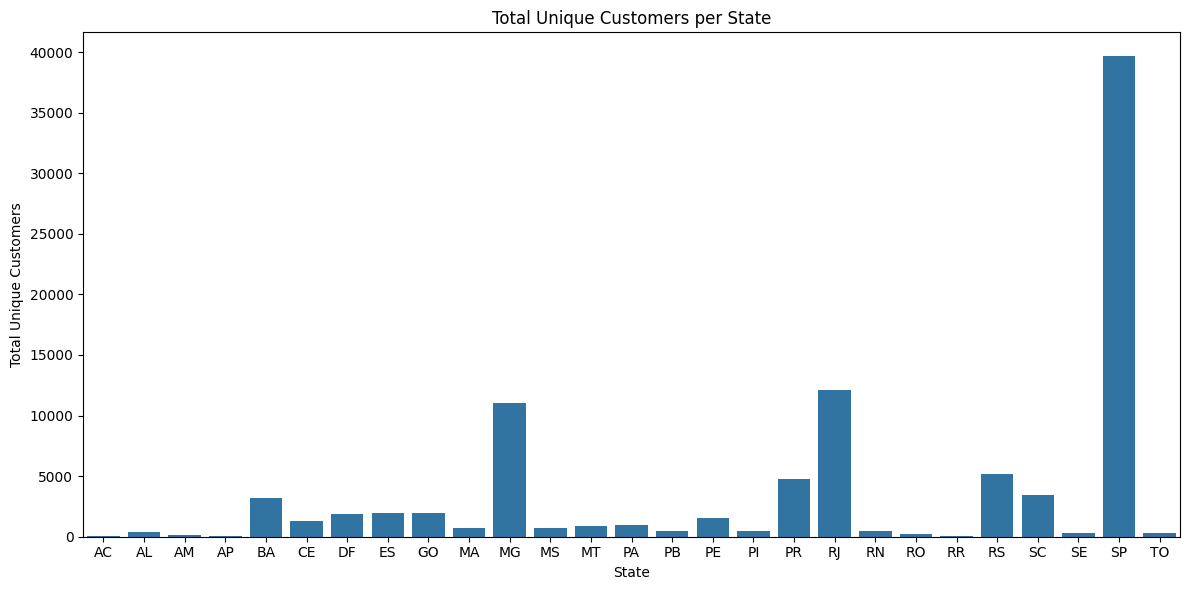

In [23]:
# Membuat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='address_static', y='total_unique_customers', data=address_static_customer_count)
plt.title('Total Unique Customers per State')
plt.xlabel('State')
plt.ylabel('Total Unique Customers')
plt.tight_layout()
plt.show()

**Insight:**

1.   State SP memiliki jumlah pelanggan unik terbanyak, diikuti oleh RJ dan MG.
2.   Beberapa state memiliki jumlah pelanggan unik yang relatif sedikit, seperti RR, AP, dan AC.

# Order Behavior

## Frekuensi Pesanan Per Customer

In [24]:
# Mengelompokkan data berdasarkan customer_unique_id dan menghitung total pesanan
customer_order_count = df_merged.groupby('customer_unique_id')['order_id'].nunique().reset_index()

# Mengubah nama kolom hasil pengelompokan
customer_order_count = customer_order_count.rename(columns={'order_id': 'total_orders'})

# Menambahkan kolom order_frequency
customer_order_count['order_frequency'] = customer_order_count['total_orders'].apply(lambda x: 'little' if x < 5 else 'lot')

In [25]:
# Menampilkan tabel customer_order_count
customer_order_count.sort_values(by='total_orders', ascending=False)

,customer_unique_id,total_orders,order_frequency
51978,8d50f5eadf50201ccdcedfb9e2ac8455,16,lot
23028,3e43e6105506432c953e165fb2acf44c,9,lot
10159,1b6c7548a2a1f9037c1fd3ddfed95f33,7,lot
37092,6469f99c1f9dfae7733b25662e7f1782,7,lot
74641,ca77025e7201e3b30c44b472ff346268,7,lot
...,...,...,...
31870,564f521732e1fbf5424fa01f0a5d41ff,1,little
31869,564e41612fe5386af042e5f4977ffa28,1,little
31867,564cb124d13d16afc61936ea12a17c33,1,little
31866,564c03a40766b9b404572658fb74524d,1,little


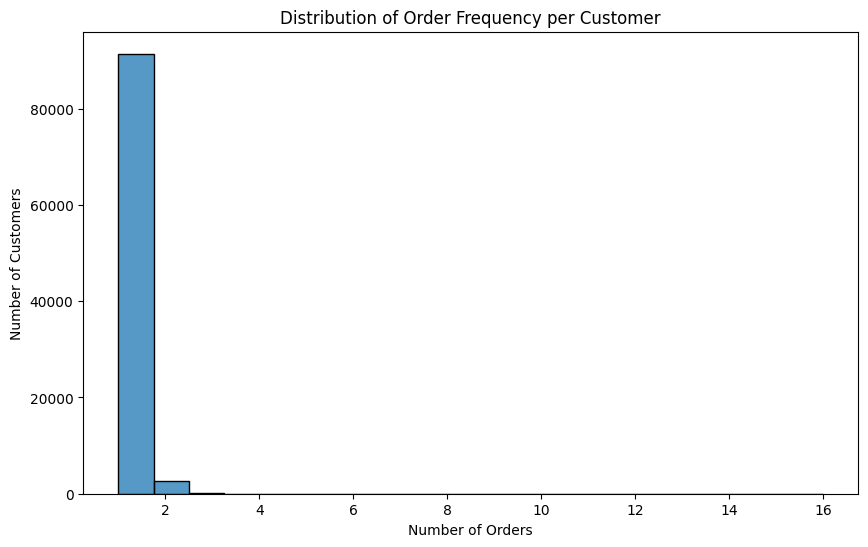

96.98% of customers made only one purchase.


In [26]:
# Membuat histogram
plt.figure(figsize=(10, 6))  # Atur ukuran gambar
sns.histplot(data=customer_order_count, x='total_orders', bins=20)  # Gunakan histplot dari seaborn
plt.title('Distribution of Order Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Menampilkan persentase pelanggan dengan satu kali pembelian
one_time_buyers = customer_order_count[customer_order_count['total_orders'] == 1]['customer_unique_id'].count()
total_customers = customer_order_count['customer_unique_id'].count()
percentage_one_time = (one_time_buyers / total_customers) * 100
print(f'{percentage_one_time:.2f}% of customers made only one purchase.')

## Selisih Total Pesanan Berdasarkan Tanggal Pembelian

In [27]:
# Mengelompokkan data berdasarkan customer_unique_id
customer_purchase_dates = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['min', 'max']).reset_index()
# Mengubah nama kolom
customer_purchase_dates = customer_purchase_dates.rename(columns={'min': 'first_purchase_date', 'max': 'last_purchase_date'})

# Menggabungkan tabel customer_purchase_dates dan customer_order_count
customer_purchase_summary = pd.merge(customer_purchase_dates, customer_order_count, on='customer_unique_id', how='left')

# Menghitung selisih antara last_purchase_date dan first_purchase_date
customer_purchase_summary['purchase_duration'] = (customer_purchase_summary['last_purchase_date'] - customer_purchase_summary['first_purchase_date']).dt.days

In [28]:
# Menampilkan tabel customer_purchase_summary
customer_purchase_summary.sort_values(by='purchase_duration', ascending=False)

,customer_unique_id,first_purchase_date,last_purchase_date,total_orders,order_frequency,purchase_duration
18810,32ea3bdedab835c3aa6cb68ce66565ef,2016-10-03 09:44:50,2018-06-28 11:46:04,3,little,633
75477,ccafc1c3f270410521c3c6f3b249870f,2016-10-06 19:33:34,2018-06-07 19:03:12,2,little,608
79974,d8f3c4f441a9b59a29f977df16724f38,2017-01-18 21:08:18,2018-08-24 17:52:59,2,little,582
54812,94e5ea5a8c1bf546db2739673060c43f,2016-10-05 21:10:56,2018-05-09 13:49:19,2,little,580
50033,87b3f231705783eb2217e25851c0a45d,2016-10-08 18:45:34,2018-05-04 11:14:37,2,little,572
...,...,...,...,...,...,...
31761,55fd57195ae0bd2ecf368bbc4be6ad96,2017-07-02 15:37:04,2017-07-02 15:37:04,1,little,0
31760,55fce1ba5ed536b6b60c5b799815f45c,2018-08-15 12:20:55,2018-08-15 12:20:55,1,little,0
31759,55fcb2a02e244d1f0de2c490cb9f5a18,2018-03-28 16:32:15,2018-03-28 16:32:15,1,little,0
31758,55fc3a9e868992d2d339316d0800ecd2,2017-08-06 22:08:58,2017-08-06 22:08:58,1,little,0


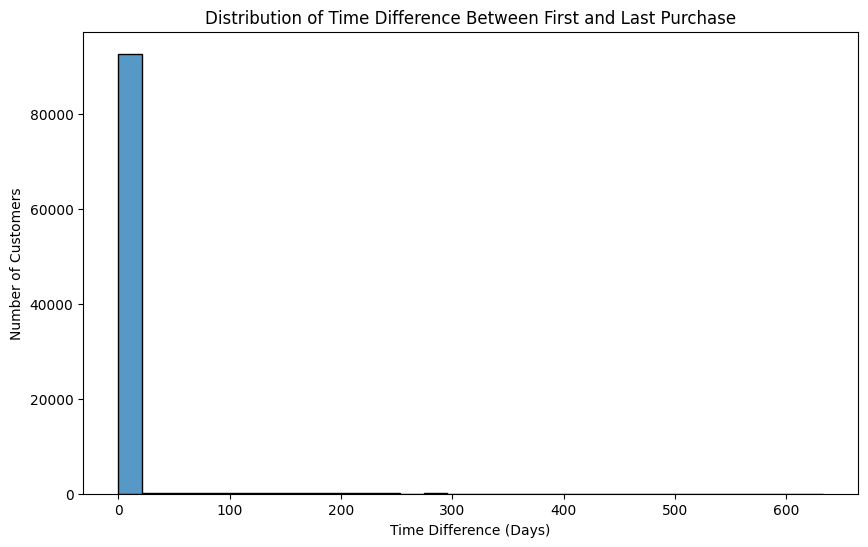

The average time difference between a customer's first and last purchase is 2.65 days.


In [29]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_purchase_summary, x='purchase_duration', bins=30)
plt.title('Distribution of Time Difference Between First and Last Purchase')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Number of Customers')
plt.show()

# Menghitung rata-rata selisih waktu
average_duration = customer_purchase_summary['purchase_duration'].mean()
print(f'The average time difference between a customer\'s first and last purchase is {average_duration:.2f} days.')

## Kesimpulan

1.   Sebagian besar pelanggan Olist hanya melakukan sedikit pembelian (kurang dari 5 pesanan). Meskipun ada beberapa pelanggan yang melakukan banyak pembelian (5 pesanan atau lebih).
2.   Durasi antara pembelian pertama dan terakhir bervariasi untuk setiap pelanggan. Ada pelanggan yang melakukan pembelian dalam rentang waktu yang singkat, dan ada juga yang melakukan pembelian dalam rentang waktu yang lama.

## Frekuensi dan Rata-rata Pesanan Per Customer

In [30]:
# Mengelompokkan data berdasarkan customer_unique_id dan menjumlahkan total item yang dipesan
customer_item_count = df_merged.groupby('customer_unique_id')['order_item_id'].sum().reset_index()
# Mengubah nama kolom order_item_id menjadi total_items_ordered
customer_item_count = customer_item_count.rename(columns={'order_item_id': 'total_items_ordered'})

# Mengelompokkan data berdasarkan customer_unique_id dan menghitung jumlah pesanan unique
customer_order_count = df_merged.groupby('customer_unique_id')['order_id'].nunique().reset_index()
# Mengubah nama kolom order_id menjadi total_orders
customer_order_count = customer_order_count.rename(columns={'order_id': 'total_orders'})

# Menggabungkan customer_item_count dan customer_order_count berdasarkan customer_unique_id
customer_summary = pd.merge(customer_item_count, customer_order_count, on='customer_unique_id', how='inner')
# Menghitung rata-rata item yang dipesan per pesanan
customer_summary['avg_items_ordered'] = customer_summary['total_items_ordered'] / customer_summary['total_orders']

# Membuat kolom order_frequency berdasarkan total_orders
# Jika total_orders kurang dari 5, maka order_frequency adalah 'little', jika tidak maka 'lot'
customer_summary['order_frequency'] = customer_summary['total_orders'].apply(lambda x: 'little' if x < 5 else 'lot')

In [31]:
# Menampilkan tabel customer_summary
customer_summary.sort_values(by='avg_items_ordered', ascending=False)

,customer_unique_id,total_items_ordered,total_orders,avg_items_ordered,order_frequency
25582,4546caea018ad8c692964e3382debd19,231,1,231.0,little
72279,c402f431464c72e27330a67f7b94d4fb,210,1,210.0,little
6681,11f97da02237a49c8e783dfda6f50e8e,120,1,120.0,little
18462,31e412b9fb766b6794724ed17a41dfa6,105,1,105.0,little
91318,f7ea4eef770a388bd5b225acfc546604,105,1,105.0,little
...,...,...,...,...,...
33544,5ab80b3d1b8c3a90d340ea343f0a04ec,1,1,1.0,little
33543,5ab77444956339264bcff5c82ed85f22,1,1,1.0,little
33542,5ab6e955205058ae5491af57f51f0302,1,1,1.0,little
33541,5ab63a2b407c27ca68d825930de62ae4,1,1,1.0,little


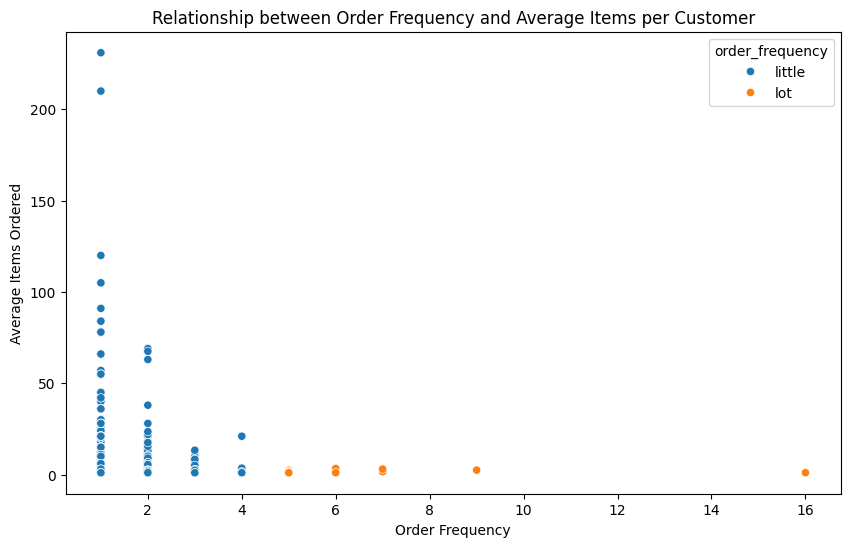

In [32]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_summary, x='total_orders', y='avg_items_ordered', hue='order_frequency')
plt.title('Relationship between Order Frequency and Average Items per Customer')
plt.xlabel('Order Frequency')
plt.ylabel('Average Items Ordered')
plt.show()

## Rata-rata dan Standar Deviasi Berat Barang

In [33]:
# Mengkonversi kolom 'product_weight_g' ke tipe data numerik
df_merged['product_weight_g'] = pd.to_numeric(df_merged['product_weight_g'], errors='coerce')

# Mengelompokkan data berdasarkan product_id dan menghitung rata-rata berat barang
avg_item_weight = df_merged.groupby('product_id')['product_weight_g'].mean().reset_index()
# Mengubah nama kolom product_weight_g menjadi avg_item_weight
avg_item_weight = avg_item_weight.rename(columns={'product_weight_g': 'avg_item_weight'})

# Mengelompokkan data berdasarkan product_id dan menghitung standar deviasi berat barang
std_item_weight = df_merged.groupby('product_id')['product_weight_g'].std().reset_index()
# Mengubah nama kolom product_weight_g menjadi std_item_weight
std_item_weight = std_item_weight.rename(columns={'product_weight_g': 'std_item_weight'})

# Menggabungkan avg_item_weight dan std_item_weight berdasarkan product_id
item_weight_summary = pd.merge(avg_item_weight, std_item_weight, on='product_id', how='inner')

In [34]:
# Menampilkan tabel item_weight_summary
item_weight_summary.sort_values(by='avg_item_weight', ascending=False)

,product_id,avg_item_weight,std_item_weight
5033,26644690fde745fc4654719c3904e1db,40425.0,0.0
24994,c3ed642d592594bb648ff4a04cee2747,30000.0,NaN
18471,90c1b4e040d1d1c45897ec2dad4a809d,30000.0,NaN
23509,b86d1f2c052bc4749ee88bb74688d814,30000.0,NaN
6122,2f465f0f879ab88842042a85bac3a937,30000.0,0.0
...,...,...,...
16581,81781c0fed9fe1ad6e8c81fca1e1cb08,0.0,NaN
16441,8038040ee2a71048d4bdbbdc985b69ab,0.0,NaN
29423,e673e90efa65a5409ff4196c038bb5af,0.0,0.0
1264,09ff539a621711667c43eba6a3bd8466,NaN,NaN


## Waktu Pemesanan Terbanyak Berdasarkan Bulan dan Hari

In [35]:
# Mendefinisikan fungsi untuk mengkategorikan waktu pemesanan
def categorize_order_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Menerapkan fungsi ke kolom 'order_purchase_hour' untuk membuat kolom 'order_time_category'
df_merged['order_time_category'] = df_merged['order_purchase_hour'].apply(categorize_order_time)
# Mengelompokkan data berdasarkan bulan, hari, dan kategori waktu pemesanan, lalu hitung frekuensi
order_time_frequency = df_merged.groupby(['order_purchase_month', 'order_purchase_day_name', 'order_time_category'])['order_id'].count().reset_index()
# Mengubah nama kolom order_id menjadi order_frequency
order_time_frequency = order_time_frequency.rename(columns={'order_id': 'order_frequency'})

#  Mengidentifikasi waktu pemesanan terbanyak untuk setiap bulan dan hari
most_frequent_order_times = order_time_frequency.loc[order_time_frequency.groupby(['order_purchase_month', 'order_purchase_day_name'])['order_frequency'].idxmax()]

In [36]:
# Menampilkan tabel most_frequent_order_times
most_frequent_order_times.sort_values(by='order_frequency', ascending=False)

,order_purchase_month,order_purchase_day_name,order_time_category,order_frequency
101,5,Tuesday,Night,946
212,11,Friday,Night,904
104,5,Wednesday,Night,894
165,8,Wednesday,Afternoon,887
131,7,Monday,Night,882
...,...,...,...,...
189,10,Friday,Afternoon,271
174,9,Saturday,Afternoon,263
179,9,Sunday,Night,261
182,9,Thursday,Night,260


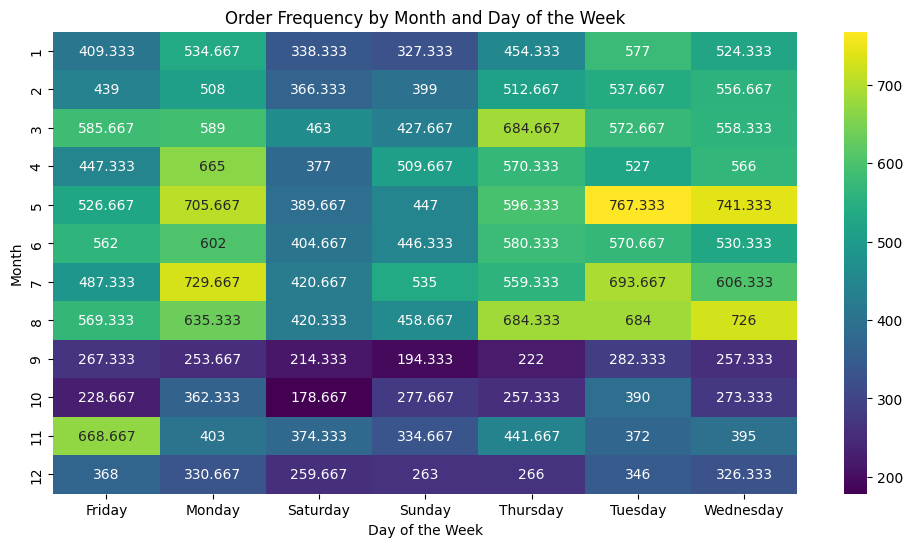

In [37]:
# Membuat heatmap
order_heatmap = order_time_frequency.pivot_table(index='order_purchase_month', columns='order_purchase_day_name', values='order_frequency')

plt.figure(figsize=(12, 6))
sns.heatmap(order_heatmap, cmap='viridis', annot=True, fmt='g')
plt.title('Order Frequency by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

## Rata-rata Nilai Pesanan dan Klasifikasi Harga

In [38]:
# Mengelompokkan data berdasarkan order_id dan menjumlahkan total nilai pesanan
order_total_value = df_merged.groupby('order_id')['total_order_value'].sum().reset_index()
# Mengubah nama kolom total_order_value menjadi total_value
order_total_value = order_total_value.rename(columns={'total_order_value': 'total_value'})

# Mengelompokkan data berdasarkan customer_unique_id dan menghitung rata-rata total nilai pesanan
avg_order_value_per_customer = df_merged.groupby('customer_unique_id')['total_order_value'].mean().reset_index()
# Mengubah nama kolom total_order_value menjadi avg_order_value
avg_order_value_per_customer = avg_order_value_per_customer.rename(columns={'total_order_value': 'avg_order_value'})

# Mendefinisikan fungsi untuk mengklasifikasikan harga pesanan
def classify_order_price(price):
    if price > 2500:
        return 'Expensive'
    elif 1000 <= price <= 2500:
        return 'Normal'
    else:
        return 'Cheap'

# Menerapkan fungsi ke kolom 'avg_order_value' untuk membuat kolom 'order_price_category'
avg_order_value_per_customer['order_price_category'] = avg_order_value_per_customer['avg_order_value'].apply(classify_order_price)


In [39]:
# Menampilkan tabel avg_order_value_per_customer (Top 5 Rata-rata nilai pesanan)
avg_order_value_per_customer.sort_values(by='avg_order_value', ascending=False)

,customer_unique_id,avg_order_value,order_price_category
3751,0a0a92112bd4c708ca5fde585afaa872,7588.01,Expensive
81224,dc4802a71eae9be1dd28f5d788ceb526,6929.31,Expensive
93972,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66,Expensive
87969,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34,Expensive
26915,48e1ac109decbb87765a3eade6854098,4681.78,Expensive
...,...,...,...
41114,6f5b9d1cdccc4d28f0483a612edecacf,11.63,Cheap
14962,2878e5b88167faab17d4fb83a986d38b,11.63,Cheap
66121,b33336f46234b24a613ad9064d13106d,10.89,Cheap
69717,bd06ce0e06ad77a7f681f1a4960a3cc6,10.07,Cheap


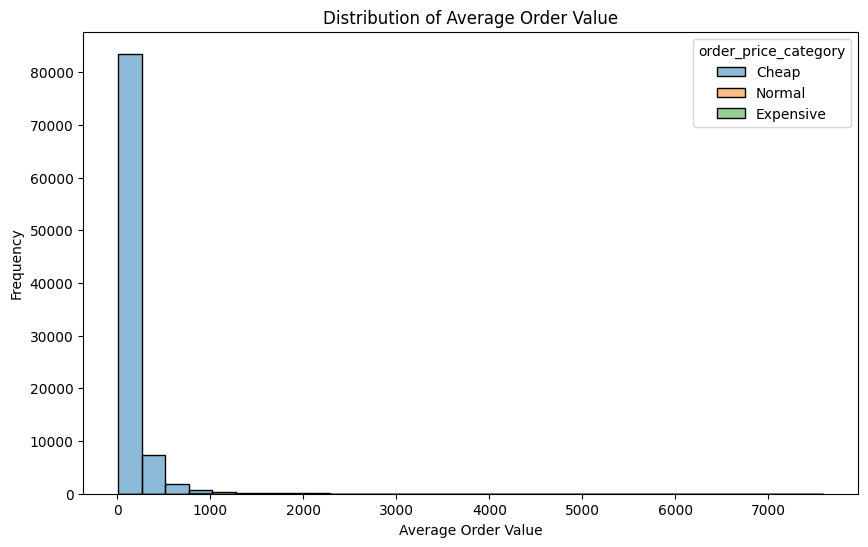

In [40]:
# Membuat histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=avg_order_value_per_customer, x='avg_order_value', hue='order_price_category', bins=30)
plt.title('Distribution of Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

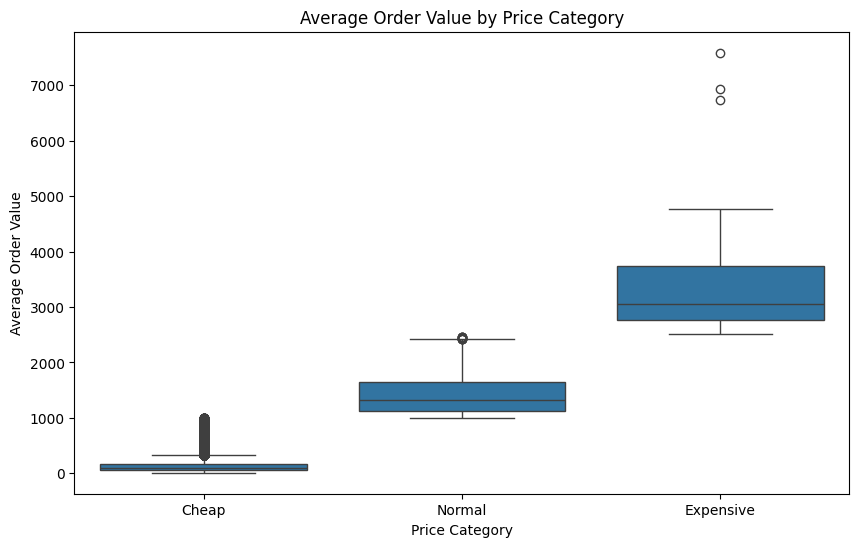

In [41]:
# Membuat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=avg_order_value_per_customer, x='order_price_category', y='avg_order_value')
plt.title('Average Order Value by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Order Value')
plt.show()

## Metode Pembayaran Terpopuler dan Preferensi Kategori Produk Setiap Pelanggan

In [42]:
# Mengelompokkan data berdasarkan payment_type dan menghitung frekuensinya
payment_method_frequency = df_merged.groupby('payment_type')['order_id'].count().reset_index()
# Mengubah nama kolom order_id menjadi frequency
payment_method_frequency = payment_method_frequency.rename(columns={'order_id': 'frequency'})
# Mencari metode pembayaran dengan frekuensi tertinggi
most_popular_payment_method = payment_method_frequency.loc[payment_method_frequency['frequency'].idxmax()]

# Mengelompokkan data berdasarkan customer_unique_id dan product_category_name, lalu menghitung frekuensinya
customer_product_preference = df_merged.groupby(['customer_unique_id', 'product_category_name'])['order_id'].count().reset_index()
# Mengubah nama kolom order_id menjadi frequency
customer_product_preference = customer_product_preference.rename(columns={'order_id': 'frequency'})
# Mencari kategori produk yang paling sering dibeli oleh setiap pelanggan
most_frequent_product_category = customer_product_preference.loc[customer_product_preference.groupby('customer_unique_id')['frequency'].idxmax()]

In [43]:
# Menampilkan output permbayaran terpopuler
most_popular_payment_method

,1
payment_type,credit_card
frequency,86071


Metode pembayaran terpopuler adaalah credit card

In [44]:
# Menampilkan tabel preferensi kategori produk oleh pelanggan
most_frequent_product_category.sort_values(by='frequency', ascending=False)

,customer_unique_id,product_category_name,frequency
58400,9a736b248f67d166d2fbb006bcb877c3,cama_mesa_banho,42
42275,6fbc7cdadbb522125f4b27ae9dee4060,moveis_escritorio,38
94380,f9ae226291893fda10af7965268fb7f6,ferramentas_jardim,35
52483,8af7ac63b2efbcbd88e5b11505e8098a,ferramentas_jardim,29
32782,569aa12b73b5f7edeaa6f2a01603e381,cama_mesa_banho,26
...,...,...,...
34406,5ac9949214b568c3731ad93d006cb789,brinquedos,1
34405,5ac97f3cac79cc2ffd9ddbbdda636bd5,relogios_presentes,1
34404,5ac93723c391241928f3c16f2149fc8a,cool_stuff,1
34403,5ac868e117b9ada5e11590ef74144102,automotivo,1


## Kategori Produk Terpopuler dan Perkembangannya Setiap Tahun

In [45]:
# Mengelompokkan data berdasarkan tahun dan kategori produk, lalu menghitung jumlah pesanan
category_orders_per_year = df_merged.groupby(['order_purchase_year', 'product_category_name'])['order_id'].count().reset_index()
# Mengubah nama kolom order_id menjadi order_count
category_orders_per_year = category_orders_per_year.rename(columns={'order_id': 'order_count'})

# Mencari kategori dengan jumlah pesanan tertinggi untuk setiap tahun
most_ordered_categories_per_year = category_orders_per_year.loc[category_orders_per_year.groupby('order_purchase_year')['order_count'].idxmax()]

most_ordered_categories_per_year

,order_purchase_year,product_category_name,order_count
24,2016,moveis_decoracao,80
46,2017,cama_mesa_banho,5696
119,2018,cama_mesa_banho,6115


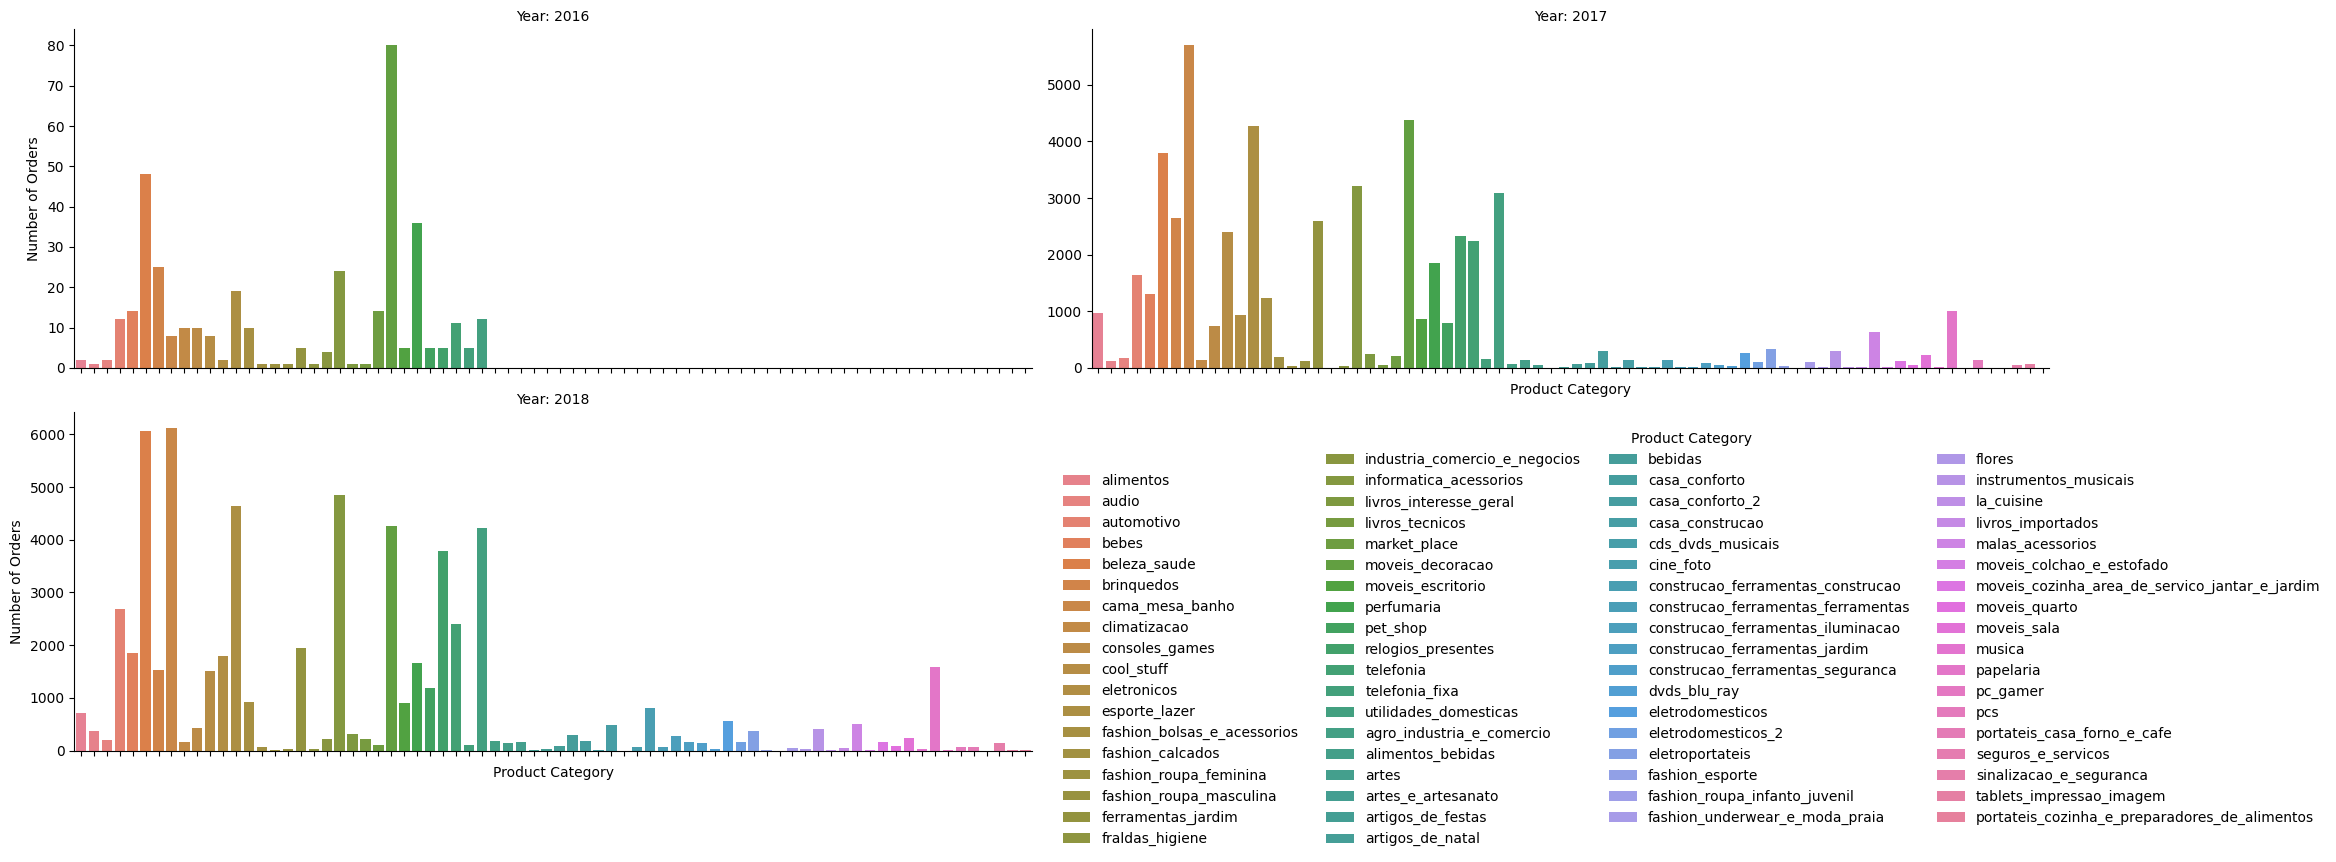

In [46]:
# Membuat FacetGrid
g = sns.FacetGrid(category_orders_per_year, col='order_purchase_year', hue='product_category_name', col_wrap=2, height=4, sharey=False)
g.map(sns.barplot, 'product_category_name', 'order_count', order=category_orders_per_year['product_category_name'].unique())
g.set_titles("Year: {col_name}")
g.set_xticklabels(rotation=90)
g.set_axis_labels("Product Category", "Number of Orders")
g.add_legend(title='Product Category', loc='lower right', bbox_to_anchor=(1.13, -0.08), ncol=4)  # Mengubah bbox_to_anchor
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.show()

**Insight:**



1.   Kategori produk cama_mesa_banho (bed_bath_table) dan beleza_saude (health_beauty) cenderung stabil dan populer di setiap tahun. Kategori ini memiliki jumlah pesanan yang relatif tinggi dan konsisten di tahun 2016, 2017, dan 2018.
2.   Kategori produk informatica_acessorios (computers_accessories) mengalami peningkatan yang signifikan dari tahun 2016 ke 2017, tetapi kemudian cenderung stabil di tahun 2018.
3.   Kategori produk moveis_decoracao (furniture_decor) dan utilidades_domesticas (housewares) juga mengalami peningkatan dari tahun 2016 ke 2017, tetapi kemudian cenderung stabil atau sedikit menurun di tahun 2018.
4.   Beberapa kategori produk lainnya, seperti auto (auto), bebe (baby), dan eletronicos (electronics), memiliki jumlah pesanan yang relatif rendah dan tidak menunjukkan tren yang jelas.



# Review Customer

## Skor Ulasan dan Tingkat Kepuasan Pelanggan

In [47]:
# Mengonversi kolom 'review_score' ke tipe data numerik
df_merged['review_score'] = pd.to_numeric(df_merged['review_score'], errors='coerce')

# Mengelompokkan data berdasarkan customer_unique_id dan menghitung rata-rata review_score
average_review_score = df_merged.groupby('customer_unique_id')['review_score'].mean().reset_index()
# Mengubah nama kolom review_score menjadi average_review_score
average_review_score = average_review_score.rename(columns={'review_score': 'average_review_score'})

# Mendefinisikan fungsi untuk menentukan tingkat kepuasan
def satisfaction_level(score):
  if score >= 4:
    return 'Satisfied'
  else:
    return 'Not Satisfied'

# Menerapkan fungsi ke kolom average_review_score untuk membuat kolom satisfaction_level
average_review_score['satisfaction_level'] = average_review_score['average_review_score'].apply(satisfaction_level)

# Menggabungkan df_merged dengan average_review_score berdasarkan customer_unique_id
df_merged = pd.merge(df_merged, average_review_score[['customer_unique_id', 'average_review_score', 'satisfaction_level']], on='customer_unique_id', how='left')

In [48]:
df_merged[['average_review_score', 'satisfaction_level']].sort_values(by=['average_review_score'], ascending=False)

,average_review_score,satisfaction_level
116749,5.0,Satisfied
43700,5.0,Satisfied
43687,5.0,Satisfied
43688,5.0,Satisfied
83297,5.0,Satisfied
...,...,...
103494,1.0,Not Satisfied
35948,1.0,Not Satisfied
103496,1.0,Not Satisfied
58542,1.0,Not Satisfied


Nb: Average review score adalah rata-rata skor ulasan setiap pelanggan yang mewakili kepuasan keseluruhan mereka

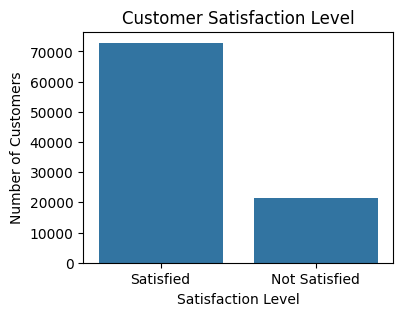

In [49]:
# Membuat count plot untuk menampilkan jumlah pelanggan untuk setiap tingkat kepuasan ("Satisfied" dan "Not Satisfied")
plt.figure(figsize=(4, 3))
sns.countplot(x='satisfaction_level', data=average_review_score)
plt.title('Customer Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.show()

Sebagian besar pelanggan Olist puas dengan produk dan layanan yang mereka terima. Ini terlihat dari jumlah pelanggan yang tergolong dalam kategori "Satisfied" yang jauh lebih banyak dibandingkan dengan kategori "Not Satisfied"

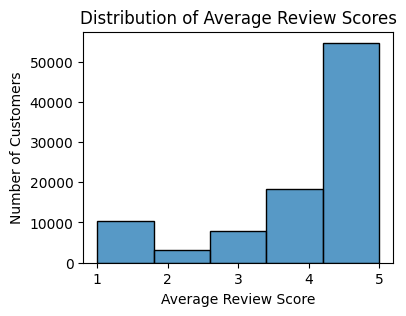

In [50]:
# Membuat histogram menampilkan distribusi skor ulasan rata-rata
plt.figure(figsize=(4, 3))
sns.histplot(x='average_review_score', data=average_review_score, bins=5)
plt.title('Distribution of Average Review Scores')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Customers')
plt.show()

Sebagian besar pelanggan memberikan skor ulasan rata-rata yang tinggi (4 atau 5). Ini menunjukkan bahwa secara umum, pelanggan Olist cukup puas dengan produk dan layanan yang mereka terima.

## Total Ulasan dan Ratio Ulasan Per Transaksi untuk Setiap Pelanggan

In [51]:
# Memilih pelanggan yang mengisi judul dan pesan ulasan
reviewed_customers = df_merged[(df_merged['review_comment_title'].notna()) & (df_merged['review_comment_message'].notna())]['customer_unique_id'].unique()
# Memfilter df_merged untuk hanya menyertakan pelanggan yang telah dipilih
filtered_df = df_merged[df_merged['customer_unique_id'].isin(reviewed_customers)]

# Mengelompokkan data berdasarkan customer_unique_id dan menghitung total ulasan
total_reviews_per_customer = filtered_df.groupby('customer_unique_id')['review_id'].count().reset_index()
total_reviews_per_customer = total_reviews_per_customer.rename(columns={'review_id': 'total_reviews'})

# Mengelompokkan data berdasarkan customer_unique_id dan menghitung total pesanan
total_orders_per_customer = filtered_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
total_orders_per_customer = total_orders_per_customer.rename(columns={'order_id': 'total_orders'})

# Menggabungkan tabel total_reviews_per_customer dan total_orders_per_customer
customer_review_summary = pd.merge(total_reviews_per_customer, total_orders_per_customer, on='customer_unique_id', how='inner')

In [52]:
# Menghitung rasio ulasan per transaksi
customer_review_summary['review_ratio'] = customer_review_summary['total_reviews'] / customer_review_summary['total_orders']

In [53]:
customer_review_summary.sort_values(by='review_ratio', ascending=False)

,customer_unique_id,total_reviews,total_orders,review_ratio
41243,6fbc7cdadbb522125f4b27ae9dee4060,38,1,38.0
56941,9a736b248f67d166d2fbb006bcb877c3,75,2,37.5
51195,8af7ac63b2efbcbd88e5b11505e8098a,29,1,29.0
31980,569aa12b73b5f7edeaa6f2a01603e381,26,1,26.0
80795,db1af3fd6b23ac3873ef02619d548f9c,24,1,24.0
...,...,...,...,...
33542,5ab6e955205058ae5491af57f51f0302,1,1,1.0
33541,5ab63a2b407c27ca68d825930de62ae4,1,1,1.0
33540,5ab603cce283352d94cc28dad9bb9570,1,1,1.0
33539,5ab466471eb1cf70568c17f1c3bb2702,1,1,1.0


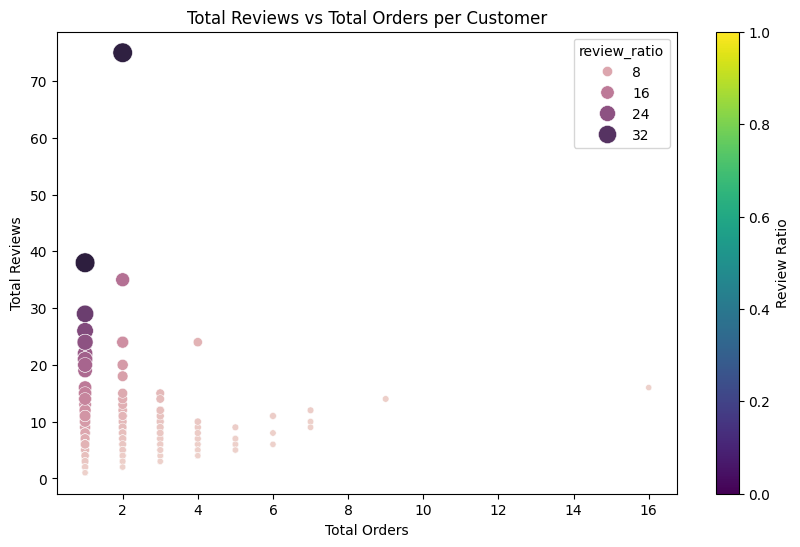

In [54]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='total_orders', y='total_reviews', data=customer_review_summary, hue='review_ratio', size='review_ratio', sizes=(20, 200))
plt.title('Total Reviews vs Total Orders per Customer')
plt.xlabel('Total Orders')
plt.ylabel('Total Reviews')
plt.colorbar(scatter.collections[0], label='Review Ratio')

plt.show()

Rasio ulasan per transaksi cenderung lebih tinggi untuk pelanggan yang melakukan lebih sedikit pemesanan. Ini terlihat dari warna dan ukuran titik data pada scatter plot. Titik-titik data dengan warna yang lebih gelap dan ukuran yang lebih besar, yang menunjukkan rasio ulasan per transaksi yang lebih tinggi, cenderung terkonsentrasi di bagian kiri scatter plot, di mana total pesanan lebih rendah



---



Pertanyaan yang mungkin muncul:

"Mengapa total reviews bisa lebih banyak dari total orders?"

Hal ini bisa terjadi karena satu pesanan dapat memiliki beberapa produk, dan setiap produk dapat diulas secara terpisah. Misalnya, jika seorang pelanggan membeli 3 produk dalam satu pesanan, mereka dapat memberikan 3 ulasan terpisah untuk setiap produk.

## Kesimpulan



1.   Sebagian besar pelanggan Olist puas dengan produk dan layanan, ditunjukkan oleh tingginya rata-rata skor ulasan dan banyaknya pelanggan yang tergolong "Satisfied".
2.   Rasio ulasan per transaksi menunjukkan frekuensi pelanggan memberikan ulasan setelah pembelian. Rasio yang tinggi mengindikasikan pelanggan yang lebih terlibat



# Time Series Analysis

## Tren Penjualan Harian

In [55]:
# Mengonversi kolom 'order_purchase_timestamp' ke tipe data datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Mengelompokkan data berdasarkan tanggal dan product_id, lalu menjumlahkan total nilai pesanan
daily_sales = df_merged.groupby([pd.Grouper(key='order_purchase_timestamp', freq='D'), 'product_id'])['price'].sum().reset_index()

# Mengubah nama kolom price menjadi total_sales
daily_sales = daily_sales.rename(columns={'price': 'total_sales'})

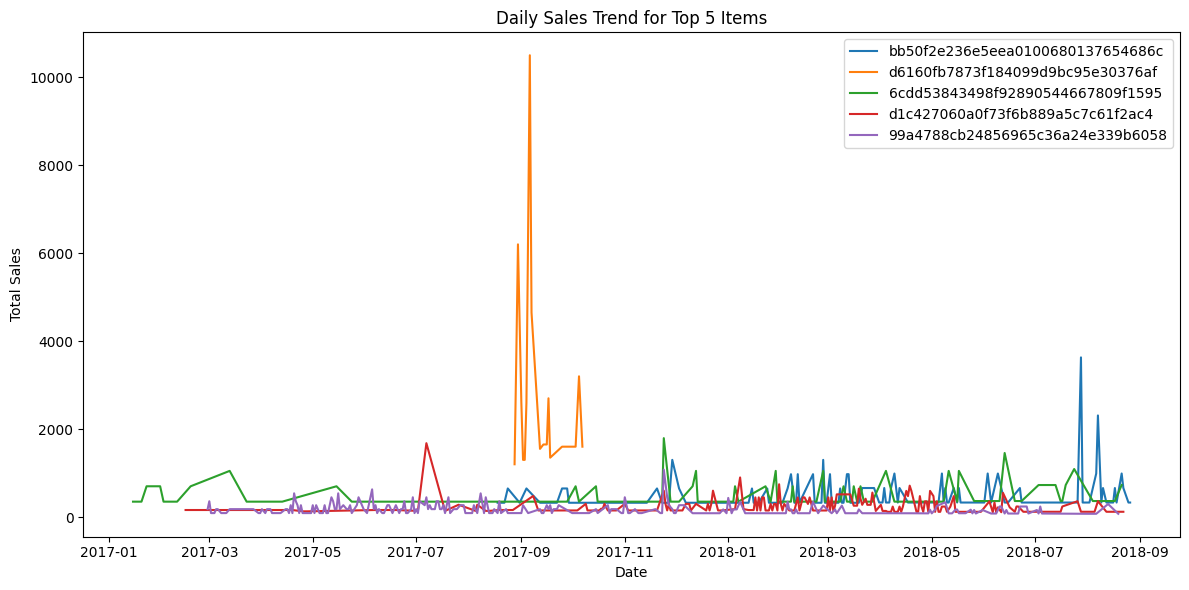

In [56]:
# Memilih 5 item dengan total penjualan tertinggi
top_5_items = daily_sales.groupby('product_id')['total_sales'].sum().nlargest(5).index

# Memfilter data untuk menampilkan tren penjualan 5 item teratas
filtered_sales = daily_sales[daily_sales['product_id'].isin(top_5_items)]

# Membuat FacetGrid
plt.figure(figsize=(12, 6))
for product_id in top_5_items:
  product_sales = filtered_sales[filtered_sales['product_id'] == product_id]
  plt.plot(product_sales['order_purchase_timestamp'], product_sales['total_sales'], label=product_id)

plt.title('Daily Sales Trend for Top 5 Items')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

Beberapa item menunjukkan tren peningkatan dan penurunan penjualan secara umum, seperti *product_id yang berwarna biru, hijau, ungu, dan merah*. Beberapa item juga menunjukkan tren stagnan atau fluktuatif, seperti *product_id yang berwarna kuning*

Nb: Karena tidak ada nama product dan hanya ada id product maka cukup sulit untuk mendapatkan insight untuk menjawab pertanyaan bisnis mengenai tren penjualan setiap item (per hari)

Maka akan lebih masuk akal dan bisa digali insight-nya jika menganalisis tren setiap kategori, bukan setiap item

In [57]:
# Mengelompokkan data berdasarkan tanggal dan product_categoty_name
daily_category_sales = df_merged.groupby([pd.Grouper(key='order_purchase_timestamp', freq='D'), 'product_category_name'])['price'].sum().reset_index()

# Mengubah nama kolom price menjadi total_sales
daily_category_sales = daily_category_sales.rename(columns={'price': 'total_sales'})

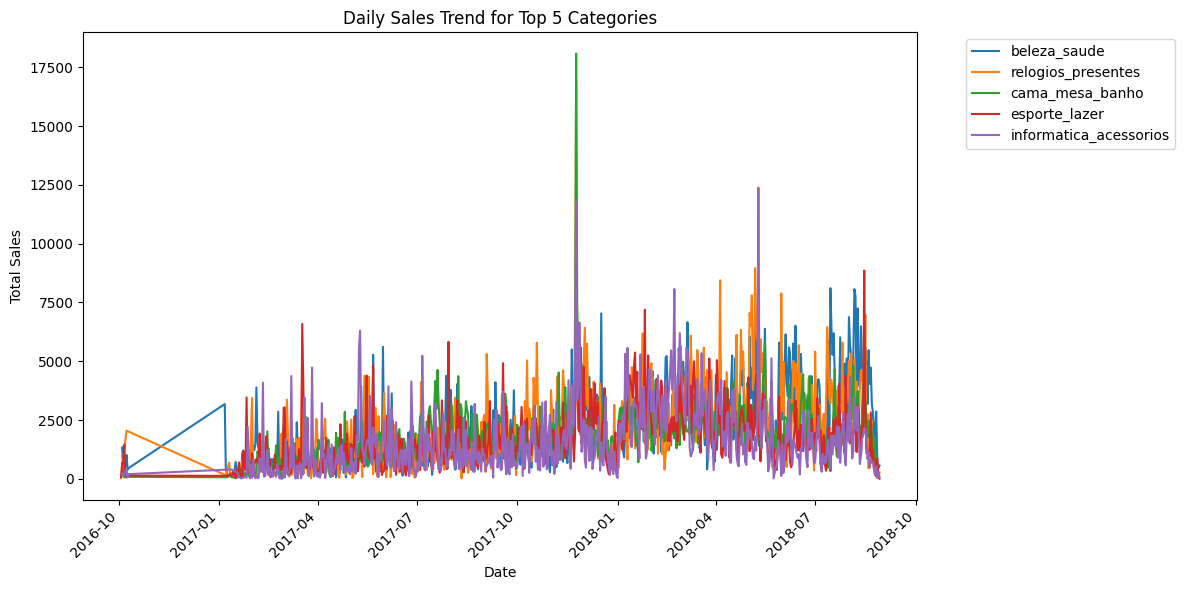

In [58]:
# Memilih 5 kategori dengan total penjualan tertinggi
top_5_categories = daily_category_sales.groupby('product_category_name')['total_sales'].sum().nlargest(5).index

# Memfilter data untuk menampilkan tren penjualan 5 kategori teratas
filtered_category_sales = daily_category_sales[daily_category_sales['product_category_name'].isin(top_5_categories)]

# Membuat Line Plot dengan Multiple Lines
plt.figure(figsize=(12, 6))
for category_name in top_5_categories:
  category_sales = filtered_category_sales[filtered_category_sales['product_category_name'] == category_name]
  plt.plot(category_sales['order_purchase_timestamp'], category_sales['total_sales'], label=category_name)

plt.title('Daily Sales Trend for Top 5 Categories')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

1.   cama_mesa_banho (Bed_bath_table), beleza_saude (health_beauty), esporte_lazer (sports_leisure), informatica_acessorios (computers_accessories), dan moveis_decoracao (furniture_decor) merupakan 5 kategori produk dengan total penjualan tertinggi.
2.   cama_mesa_banho (Bed_bath_table) dan beleza_saude (health_beauty) menunjukkan tren penjualan yang relatif stabil dan cenderung meningkat secara perlahan.
3.   esporte_lazer (sports_leisure) dan informatica_acessorios (computers_accessories) menunjukkan tren penjualan yang fluktuatif dengan beberapa periode peningkatan dan penurunan.



**Rrekomendasi bisnis:**



1.   Kategori dengan tren stabil/meningkat (cama_mesa_banho (bed_bath_table), beleza_saude (health_beauty)): Pertahankan strategi penjualan yang ada, pastikan ketersediaan stok, dan pertimbangkan untuk meningkatkan promosi atau memperluas pasar
2.   Kategori dengan tren fluktuatif (esporte_lazer (sports_leisure), informatica_acessorios (computers_accessories)): Identifikasi penyebab fluktuasi penjualan dan lakukan penyesuaian strategi, seperti promosi yang lebih tertarget pada periode penjualan rendah, atau penyesuaian stok berdasarkan pola musiman.
3.   Kategori dengan tren menurun (moveis_decoracao (furniture_decor)): Pertimbangkan untuk melakukan inovasi produk, meningkatkan strategi pemasaran, atau menawarkan promosi.



## Analisis Musiman Berdasarkan Total Pesanan Harian

In [59]:
# Agregasi data total pesanan per hari dalam seminggu
daily_orders = df_merged.groupby('order_purchase_day_name')['order_id'].nunique().reset_index()
daily_orders = daily_orders.rename(columns={'order_id': 'total_orders'})

# Mengurutkan hari dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = pd.CategoricalDtype(categories=days_order, ordered=True)
daily_orders['order_purchase_day_name'] = daily_orders['order_purchase_day_name'].astype(day_type)
daily_orders = daily_orders.sort_values('order_purchase_day_name')

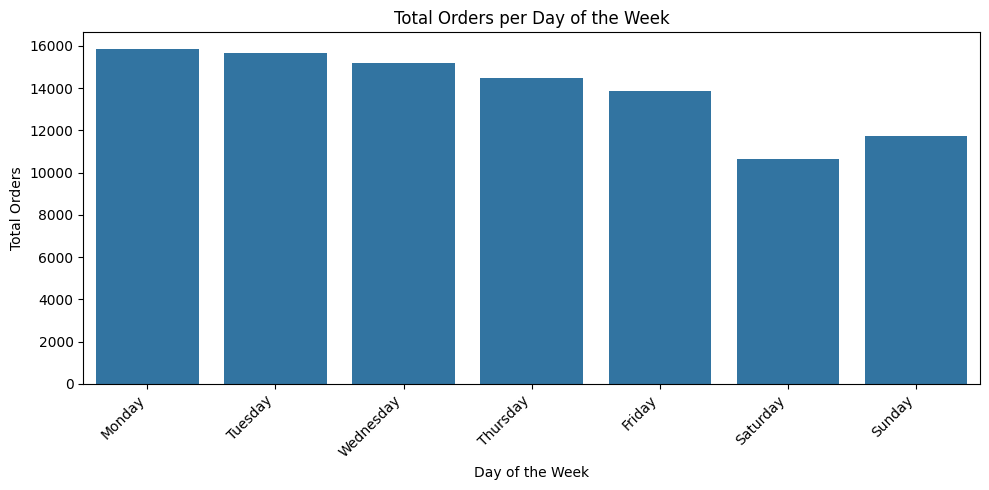

In [60]:
# Visualisasi total pesanan per hari dalam seminggu
plt.figure(figsize=(10, 5))
sns.barplot(x='order_purchase_day_name', y='total_orders', data=daily_orders)
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

1.   Hari Senin merupakan hari dengan total pesanan tertinggi
2.   Sedangkan hari sabtu merupakan hari dengan total pesanan terendah
3.   Terdapat penurunan pesanan di akhir pekan (Sabtu dan Minggu) dan peningkatan pesanan di awal minggu (Senin dan Selasa). Kemudian, tren pesanan cenderung stabil di hari Rabu, Kamis, dan Jumat.



# Kesimpulan (Keseluruhan)


1. Olist memiliki basis pelanggan yang besar dan aktif, yang sebagian besar terkonsentrasi di beberapa negara bagian tertentu.
2. Sebagian besar pelanggan melakukan pembelian yang jarang, namun terdapat peluang untuk meningkatkan frekuensi pesanan dan nilai rata-rata pesanan.
3. Kepuasan pelanggan secara umum tinggi, namun masih ada ruang untuk perbaikan dalam menangani ulasan negatif dan meningkatkan pengalaman pelanggan secara keseluruhan.
4. Terdapat pola musiman mingguan yang jelas dalam total pesanan, yang menyoroti perlunya strategi pengelolaan inventaris dan penjadwalan staf yang adaptif.

# Rekomendasi dan Saran (Keseluruhan)

1. Lakukan kampanye pemasaran yang ditargetkan di negara bagian dengan penetrasi pelanggan yang lebih rendah untuk memperluas jangkauan pasar dan mendapatkan pelanggan baru.
2. Kembangkan program loyalitas dan penawaran yang dipersonalisasi untuk mendorong pembelian berulang dan meningkatkan nilai pelanggan seumur hidup.
3. Promosikan produk dengan harga lebih tinggi, terapkan strategi cross-selling dan upselling, serta tawarkan paket atau diskon untuk mendorong pesanan yang lebih besar.
4. Tangani ulasan negatif secara proaktif, tingkatkan channel layanan pelanggan, dan pastikan pengiriman tepat waktu untuk meningkatkan kepuasan pelanggan.
5. Optimalkan tingkat inventaris berdasarkan pola musiman mingguan untuk meminimalkan kekurangan stok dan penundaan. Sesuaikan jumlah staf untuk mengimbangi periode pesanan puncak dan rendah guna meningkatkan layanan dan efisiensi.

